# Лабораторна робота №3 
### Диференційні рівняння
Авраменко Нікіта, група коп'ютерна математика

## Варіант 2
Приклад:
$$
\large f(x,y) = x^2+y^2,\ x_0=0,\ y_0=0,\ a=1,\ b=2
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from sympy.solvers import solve
from sympy import Symbol
from sympy import *

# Задача 1
$\text{У прямокутнику}\ \Pi=\{(x,y)\in \mathbb{R}^2:|x-x_0|\leq a,\ |y-y_0|\leq b\} \enspace \text{задана задача Коші} \enspace \frac{dy}{dx} = f(x,y),y(x_0) = y_0$
### Завдання 1. 
Знайти сталу Ліпшниця функції $f(x,y) \ в \ \Pi$ та перевірити виконання умов теореми Пікара.

In [2]:
from sympy.abc import x,y,z,L
a,b=1,2
x0,y0 = 0,0
step = 0.001
f = x**2+y**2
h = diff(f,y)
print(f"Solve f'y: x = {solveset(f,x)},  y = {solveset(f,y)}")
print(f"f = {f} - неперервна\n")
print(f"Solve f'y: y =  {solveset(h,y)}")
print(f"f'y = {h} - неперервна\n")
p = lambdify(y,h)
L = round(max(np.abs(p(np.arange(-b,b+step,step)))),4)
print(f"L = {L} - стала Ліпшниця")

Solve f'y: x = {-I*y, I*y},  y = {-I*x, I*x}
f = x**2 + y**2 - неперервна

Solve f'y: y =  {0}
f'y = 2*y - неперервна

L = 4.0 - стала Ліпшниця


### Завдання 2. 
На якому проміжку $[x_0-h,x_0+h]$ теорема Пікара гарантує збіжність послідовних наближень?

In [3]:
step = 400
def f1(x,y):
    return x**2+y**2
M = round(max(np.abs(f1(np.linspace(-a,a,step),np.linspace(-b,b,step)))),4)
print(f'M = {M}')
h = min(a,b/M)
print(f'h = {h}')
hl = x0-h
hr = x0+h
print(f"\nНа проміжку [{hl}, {hr}] теорема Пікара гарантує збіжність послідовних наближень.")

M = 5.0
h = 0.4

На проміжку [-0.4, 0.4] теорема Пікара гарантує збіжність послідовних наближень.


### Завдання 3.
Знайти кожне третє наближення $y_3(x), \ x \in [x_0-h,x_0+h]$ заданої задачі Коші.

In [4]:
f = x**2+y**2
f1 = y0

for i in range(3):
    f1 = y0 + integrate(f.subs(y,f1), (x,x0,x))
    print(f'y{i+1}(x) = {f1}')

y1(x) = x**3/3
y2(x) = x**7/63 + x**3/3
y3(x) = x**15/59535 + 2*x**11/2079 + x**7/63 + x**3/3


### Завдання 4.
Оцінити $max|y(x)-y_3(x)| = \beta_3$. При якому $n$ буде виконуватись нерівність $\beta_n\leq10^{-3}$?

In [5]:
from math import factorial
print(f'max|y(x) - y3(x)| = {(M*(L*h)**4)/(L*factorial(4))}\n')

def funk(k):
    return (M*(L*h)**(k+1))/(L*factorial(k+1))

e = 10**(-3)
for i in range(100):
    B = funk(i)
    if B <= e:
        print(f'При n={i}  B<=10^(-3)')
        break

max|y(x) - y3(x)| = 0.34133333333333343

При n=8  B<=10^(-3)


### Завдання 5.
Для заданого $x_1 \in [x_0-h,x_0+h]$ знайти $y(x_1)$ з точністю до $10^{-6}$.

In [6]:
x1 = 0.3             #вводимо х1
if x1 <hl or x1 > hr:
    print('Помилка. Не належить проміжку')
else:
    f = x**2+y**2
    f1 = y0
    
    for i in range(6):
        f1 = y0 + integrate(f.subs(y,f1), (x,x0,x))
        
    print(f'y{i+1}(x) = {round(f1.subs(x,x1),6)}')

y6(x) = 0.009003


# Задача 2.
В області $K \in \mathbb{R}^2$ задано задачу Коші $y' = g(y),\ y(x_0)=y_0$.
Приклад:

$$
g(y) = -3y^{2/3},\ x_0 = 0,\ y_0 = 0,\ K = \{(x,y) \in \mathbb{R}^2: |x|+|y| \leq 2\}
$$

### Завдання 1
Чи виконані для заданої задачі Коші умови теореми Пеано? На якому інтервалі ця теорема гарантує існівання розв'язку заданої задачу Коші?

In [7]:
def fun(x,y):
    return abs(x) + abs(y)
a = 0
b = 0
for i in np.arange(-2,2,0.01):
    a = max(a, fun(i,0))
    b = max(b, fun(0,i))
    
print(f'a = {a}, b = {b}')

from sympy.abc import x,y,z
x0,y0 = 0,0
step = 0.001
f = -3*y**(2/3)
h = diff(f,y)
print(f"Solve f'y: y = {solveset(f,y)}")
print(f"f = {f} - неперервна\n")
step = 400
def f1(x,y):
    return x**2+y**2
M = round(max(np.abs(fun(np.linspace(-a,a,step),np.linspace(-b,b,step)))),4)
print(f'M = {M}')
h = min(a,b/M)
print(f'h = {h}')

x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
x, y = np.meshgrid(x, y)

a = 2.0, b = 2.0
Solve f'y: y = ConditionSet(y, Eq(y**0.666666666666667, 0), Complexes(Reals x Reals, False))
f = -3*y**0.666666666666667 - неперервна

M = 4.0
h = 0.5


### Завдання 2
Знайти всі розв'язки заданої задачі Коші. Вказати максимальний та мінімальний розв'язки цієї задачі. 

In [12]:
from sympy import *
from sympy.abc import x,y,C
g = -3*y**(2/3)
h = x - integrate(1/g, y) + C
reps = [(y, y0), (x, x0)]
f = solve(h,y)
c = solve(f[0].subs(reversed(reps)),C)[0]
g = f[0]
f = solve(h,y)[0].subs(C,0)
print(f'y = {f}')
f = lambdify(x,f)
max_val = 0
min_val = 10**10
for i in np.arange(-2,2+0.01,0.01):
    max_val = max(max_val, f(i))
    min_val = min(min_val, f(i))
print(f'max значення = {round(max_val,6)}, min значення = {round(min_val,6)} для y = -x**3')

vals = np.linspace(-2,2,400)

max_C = 10**10     #бо для -(x+c)**3 якщо с буде рости, то значення вісі у навпаки падати
min_C = 0

def br(x,c):
    return -(x+c)**3

for c in np.arange(-12,12,0.01):
    g1 = br(vals,c)
    if any(g1<=2) and any(g1>=-2):
        max_C = min(max_C, c)
        min_C = max(min_C, c)
print(f'max C = {round(max_C,6)}, min C = {round(min_C,6)} для y = -(x+С)**3 ')
    

y = -x**3
max значення = 8.0, min значення = -8.0 для y = -x**3
max C = -3.25, min C = 3.25 для y = -(x+С)**3 


### Завдання 3.
Зобразити геометричну фігуру $G$, яку "заповнюють" інтегральні криві - графіки розв'язків заданої задачі.

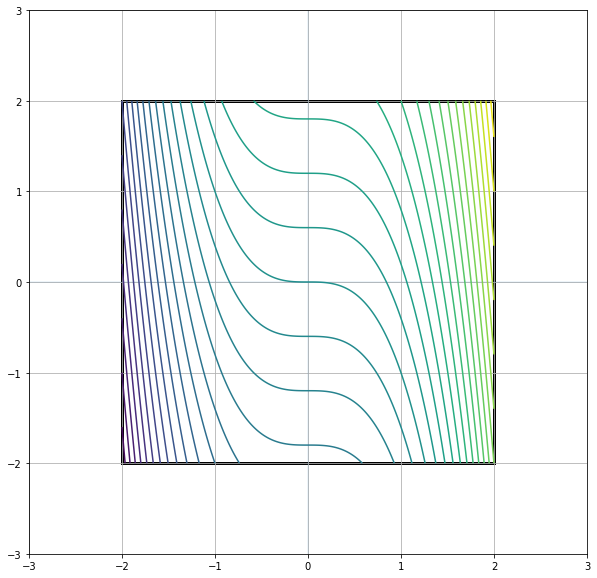

In [9]:
import matplotlib.patches as patches
fig, ax = plt.subplots(figsize=(10,10))
ax.axhline(0, alpha=.1)
ax.axvline(0, alpha=.1)
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)
x, y = np.meshgrid(x, y)
ax.contour(x,y,(y+x**3),35)
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
rect = patches.Rectangle((-2,-2),4,4,linewidth=3,edgecolor='k',facecolor='none')
ax.add_patch(rect)
plt.grid(True)